In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PC_SL import *

In [19]:
df_asia = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat")
df_child = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat")
df_insurance = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat")
df_water = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\Water_1000.dat")
df_alarm = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat")
df_barley = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat")
df_hailfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hailfinder.dat")
df_hepar2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat")
df_andes = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\andes.dat")
df_link = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link.dat")
df_pathfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\pathfinder.dat")
df_munin2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\munin2.dat")

In [2]:
df_test = csv_format_discrete(r'barley_testing.dat')

In [29]:
%%time
'''
restrict phase
'''
toc = time.time()
k = PC_SL(df_insurance, 1, 0.05)
tic = time.time()
print('the time taken to restrict edges is', tic - toc, 'seconds')

the number of restricted edges is : 254
the time taken to restrict edges is 27.402801990509033 seconds
CPU times: total: 27 s
Wall time: 27.4 s


In [28]:
%%time
tic = time.time()
'''
score phase
'''
m = Gobnilp()
for i in k:
    m.add_forbidden_adjacency((i[0], i[1]))
                              
m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat", palim=4)

# m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link_testing.csv")
toc = time.time()
print('the time taken to learn the graph', toc - tic, 'seconds')
print('The F-score is ', F_score(m))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0


TypeError: cannot unpack non-iterable NoneType object

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -327249.4984184264
**********
ChHepatitis<-injections,transfusion,vh_amn -5552.798764759034
transfusion<-choledocholithotomy,hospital -4274.756595791754
injections<-choledocholithotomy,hospital,surgery -4957.732415147249
vh_amn<-hbsag_anti -4750.593665355365
Cirrhosis<-Steatosis,fibrosis -1557.7585484415904
fibrosis<-ChHepatitis -992.2782119339245
Steatosis<-alt -3259.0554074852553
ESR<-ChHepatitis,PBC -6966.522638191505
PBC<-age,sex -4786.314893336028
Hyperbilirubinemia<-sex -2509.8902303594514
sex<- -6720.9207806503255
age<-Hyperbilirubinemia -11655.079025954896
RHepatitis<-phosphatase -1239.604110658358
phosphatase<-ChHepatitis,THepatitis -9736.290352844582
alt<-ChHepatitis -11767.903552451986
THepatitis<-as

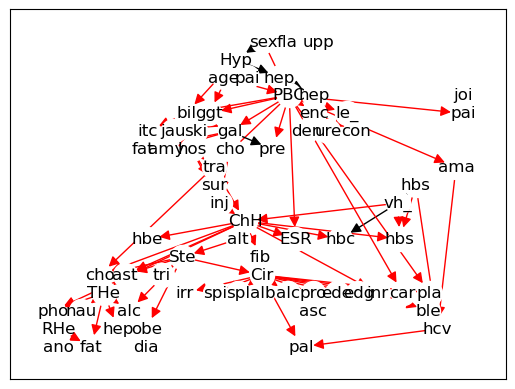

the time taken to learn the network is: 206.902734041214 seconds
CPU times: total: 5min 11s
Wall time: 3min 26s


In [22]:
%%time
toc = time.time()

'''
score-based algorithm
'''
T = Gobnilp()
#score phase##
T.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat", palim=3)
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
#started at 3:45

In [6]:
def F_score(u):
    #j_0#
    '''
    u = hybrid graph
    v = real graph
    '''
    u_frozenset = []
    for i in u.adjacency.items():
        if i[1].X >= 1:
            u_frozenset.append(i[0])
    hybrid = [list(x) for x in u_frozenset]
    ##
    
    T_frozenset = []
    for i in T.adjacency.items():
        if i[1].X >= 1:
            T_frozenset.append(i[0])
    real = [list(x) for x in T_frozenset]
    
    #Finding TP, FP, FN#
    TP = [x for x in hybrid if x in (y for y in real)]
    FP = [x for x in hybrid if x not in (y for y in real)]
    FN = [x for x in real if x not in (y for y in hybrid)]
    
    # F_score#
    F_score = (2 * len(TP)) / (2 * len(TP) + len(FP) + len(FN))
    print('False Positive = ' ,FP)
    print('False Negative = ' ,FN)
    return F_score

In [16]:
F_score(m)

False Positive =  [['Fourteen', 'Eight'], ['Twentyfive', 'Eight'], ['Sixteen', 'Fifteen'], ['Twentyfour', 'Fifteen'], ['Thirtysix', 'Forty'], ['Thirtynine', 'Fortyfive'], ['Thirtyfive', 'Fortyfour'], ['Sixteen', 'Fortyone'], ['Fortysix', 'Fortyseven'], ['Thirtyeight', 'Fortyseven'], ['Thirtyeight', 'Fortysix'], ['Thirtysix', 'Fortysix'], ['Twentyfive', 'Fortytwo'], ['Thirteen', 'Nine'], ['Thirtyfive', 'Nineteen'], ['Thirtysix', 'Nineteen'], ['Ten', 'Six'], ['Twelve', 'Six'], ['Thirtyeight', 'Thirtyfive'], ['Twentyfive', 'Twentythree']]
False Negative =  [['Fortythree', 'Nine'], ['Fortythree', 'Thirtytwo'], ['Thirtyfive', 'Seventeen']]


0.7889908256880734